In [7]:
import cv2

# Load image
img = cv2.imread('filtered_image.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cv2.imshow('image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import numpy as np
import cv2
from skimage.segmentation import felzenszwalb
from skimage.measure import regionprops
import networkx as nx

def selective_search(image, scale=100, sigma=0.8, min_size=50):
    """
    Perform selective search on an image to generate bounding boxes.
    """
    # Convert to LAB color space
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Initial segmentation
    segments = felzenszwalb(image_lab, scale=scale, sigma=sigma, min_size=min_size)

    # Create a graph for region adjacency
    graph = nx.Graph()
    unique_segments = np.unique(segments)
    for seg in unique_segments:
        graph.add_node(seg)

    # Add edges between adjacent regions (simplified example)
    for y in range(segments.shape[0] - 1):
        for x in range(segments.shape[1] - 1):
            current_seg = segments[y, x]
            neighbors = [segments[y + 1, x], segments[y, x + 1]]
            for neighbor in neighbors:
                if current_seg != neighbor:
                    graph.add_edge(current_seg, neighbor)

    # Generate bounding boxes from the segments
    regions = regionprops(segments)
    boxes = []
    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        boxes.append((minc, minr, maxc - minc, maxr - minr))  # x, y, width, height

    return boxes

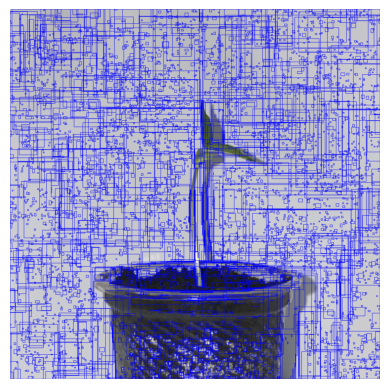

In [9]:
if __name__ == "__main__":
    # Load an image
    #img = cv2.imread("P1/D1/stage 3/IMG_6194.jpg")  # Replace with your image path
    if img is None:
        print("Error: Failed to load the image.")
        exit()

    # Perform selective search
    try:
        bounding_boxes = selective_search(img)
    except Exception as e:
        print(f"Error while performing selective search: {e}")
        exit()

    # Display results
    for box in bounding_boxes:
        x, y, w, h = box
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Show the image with bounding boxes
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    cv2.imwrite("Output.jpg", img)

In [ ]:
for x,y,w,h in bounding_boxes:
    roi = img[y:y+h,x:x+w]
    
    roi_resized = cv2.resize(roi,(224,224))
    
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    cv2.imwrite("Output.jpg", img)